In [2]:
# !pip install scikit-fuzzy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [6]:
# Formation of crisp sets
x_qual = np.arange(0, 11, 1) # Quality
x_serv = np.arange(0, 11, 1) # Service
x_tip = np.arange(0, 26, 1) # Tip

In [7]:
# Generating fuzzy membership functions
qual_low  = fuzz.trimf(x_qual, [0, 0, 5])
qual_mid  = fuzz.trimf(x_qual, [0, 5, 10])
qual_high = fuzz.trimf(x_qual, [5, 10, 10])

serv_low  = fuzz.trimf(x_serv, [0, 0, 5])
serv_mid  = fuzz.trimf(x_serv, [0, 5, 10])
serv_high = fuzz.trimf(x_serv, [5, 10, 10])

tip_low  = fuzz.trimf(x_tip, [0, 0, 13])
tip_mid  = fuzz.trimf(x_tip, [0, 13, 25])
tip_high = fuzz.trimf(x_tip, [13, 25, 25])

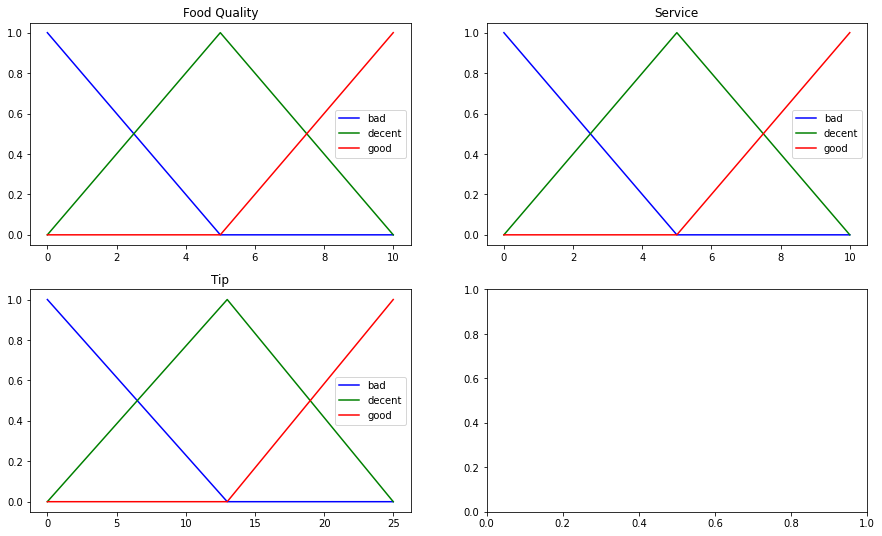

In [8]:
# Visulize these universes and membership functions
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

ax0.plot(x_qual, qual_low, 'b', linewidth=1.5, label='bad')
ax0.plot(x_qual, qual_mid, 'g', linewidth=1.5, label='decent')
ax0.plot(x_qual, qual_high, 'r', linewidth=1.5, label='good')
ax0.set_title('Food Quality')
ax0.legend()

ax1.plot(x_serv, serv_low, 'b', linewidth=1.5, label='bad')
ax1.plot(x_serv, serv_mid, 'g', linewidth=1.5, label='decent')
ax1.plot(x_serv, serv_high, 'r', linewidth=1.5, label='good')
ax1.set_title('Service')
ax1.legend()

ax2.plot(x_tip, tip_low, 'b', linewidth=1.5, label='bad')
ax2.plot(x_tip, tip_mid, 'g', linewidth=1.5, label='decent')
ax2.plot(x_tip, tip_high, 'r', linewidth=1.5, label='good')
ax2.set_title('Tip')
ax2.legend();

0.0 0.7 0.30000000000000004
0.0 0.03999999999999987 0.9600000000000002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] [0.   0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.  ]


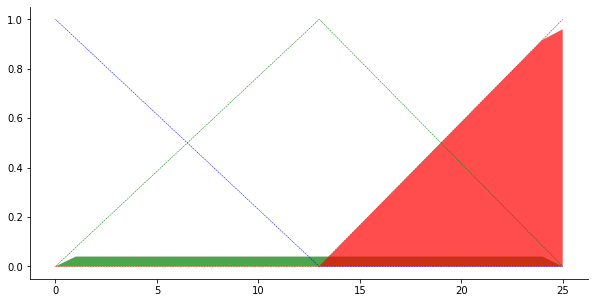

In [9]:
qual_level_low  = fuzz.interp_membership(x_qual, qual_low, 6.5)
qual_level_mid  = fuzz.interp_membership(x_qual, qual_mid, 6.5)
qual_level_high = fuzz.interp_membership(x_qual, qual_high, 6.5)
print(qual_level_low, qual_level_mid, qual_level_high)

serv_level_low  = fuzz.interp_membership(x_serv, serv_low, 9.8)
serv_level_mid  = fuzz.interp_membership(x_serv, serv_mid, 9.8)
serv_level_high = fuzz.interp_membership(x_serv, serv_high, 9.8)
print(serv_level_low, serv_level_mid, serv_level_high)

# Rule 1 - we connect low service or low food with low tipping
active_rule_1 = np.fmax(qual_level_low, serv_level_low)
tip_activation_low  = np.fmin(active_rule_1, tip_low)
tip_activation_mid  = np.fmin(serv_level_mid, tip_mid)
print(tip_activation_low, tip_activation_mid)

# Rule 3 - we connect high service or high food with high tipping
active_rule_3 = np.fmax(qual_level_high, serv_level_high)
tip_activation_high = np.fmin(active_rule_3, tip_high)
tip0 = np.zeros_like(x_tip)

fig, ax0 = plt.subplots(figsize=(10,5))
ax0.fill_between(x_tip, tip0, tip_activation_low, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_low, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_mid, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_mid, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_high, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_high, 'r', linewidth=0.5, linestyle='--')

# Turn off top/right axes
for ax in (ax0, ):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


In [10]:
# Aggregate all three activation functions
aggregated = np.fmax(tip_activation_low, 
               np.fmax(tip_activation_mid, tip_activation_high))


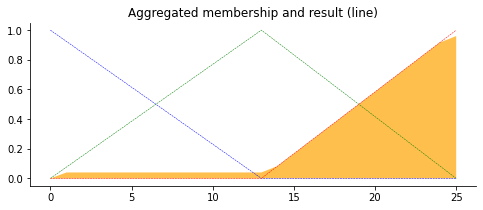

In [16]:
#Defuzzified Result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip) #for plot

#Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_low, 'b', linewidth=0.5, linestyle='--',)
ax0.plot(x_tip, tip_mid, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_high, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()